# Green AI Project

## Getting the AirParif data

In [43]:
import dataRetriever as dr
import pandas as pd
import quickPlotter as qp
import airparifDataPrep
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
hourly_df, daily_df = airparifDataPrep.getAirparifData("data")

## Analysis

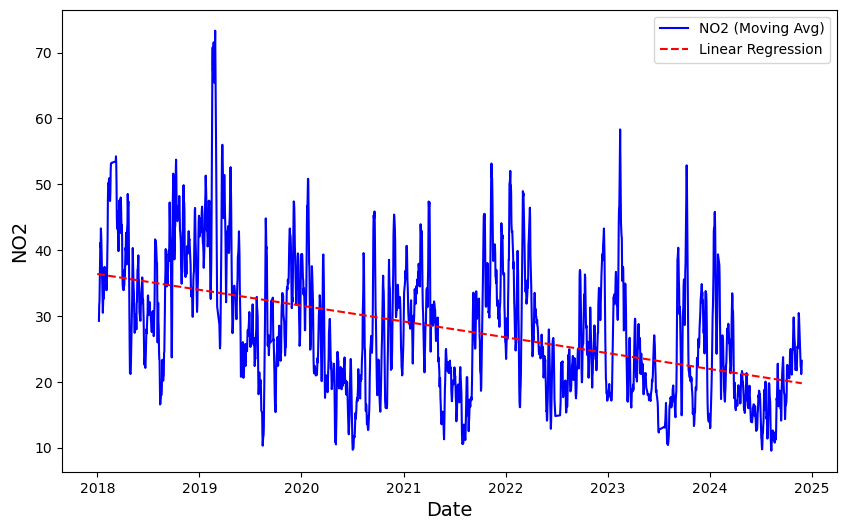

In [45]:
plot = qp.quickRegPlot(daily_df, "date", "NO2", True, 7)

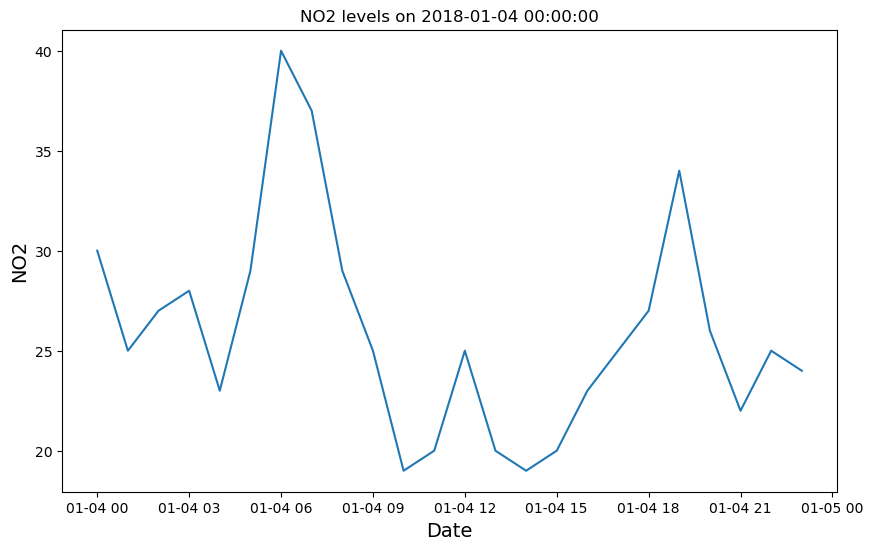

In [46]:
qp.pollutantLevelsOnDay("2018-01-04", "NO2", hourly_df)

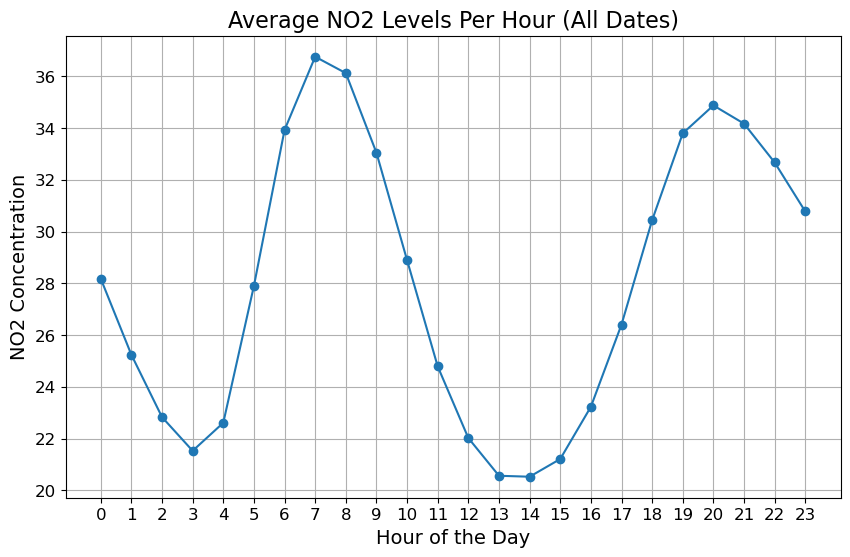

In [47]:
qp.avgPollutantLevelPerHour("NO2", hourly_df)

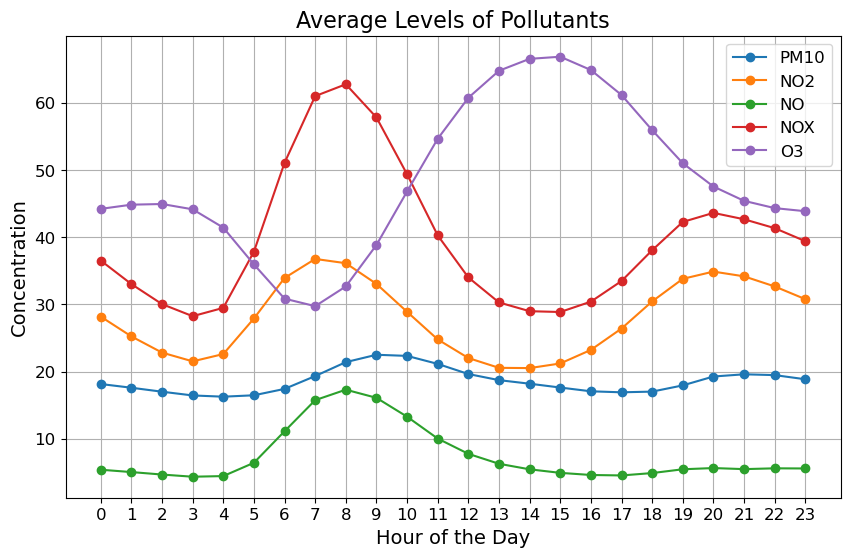

In [56]:
qp.avgAllPolutantsPerHour(hourly_df)

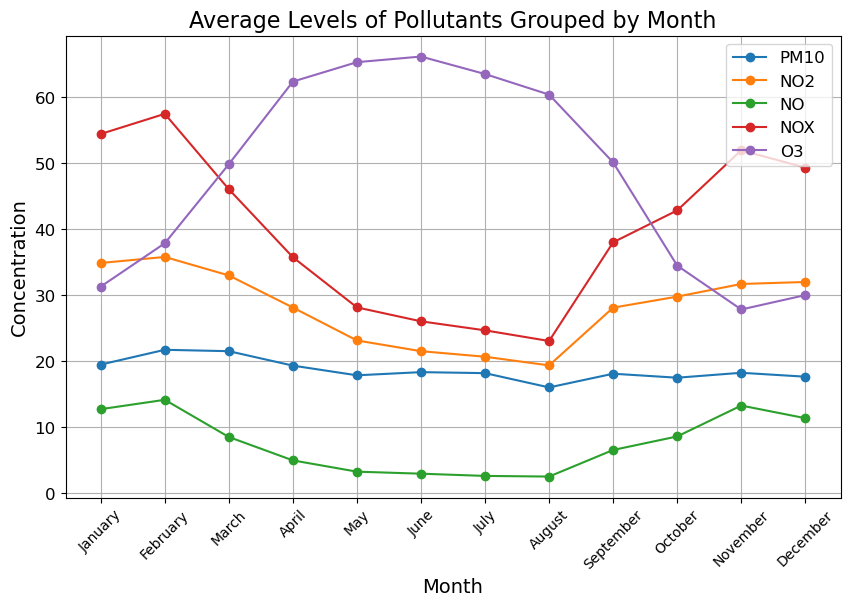

In [58]:
qp.avgAllPolutantsPerMonth(daily_df)

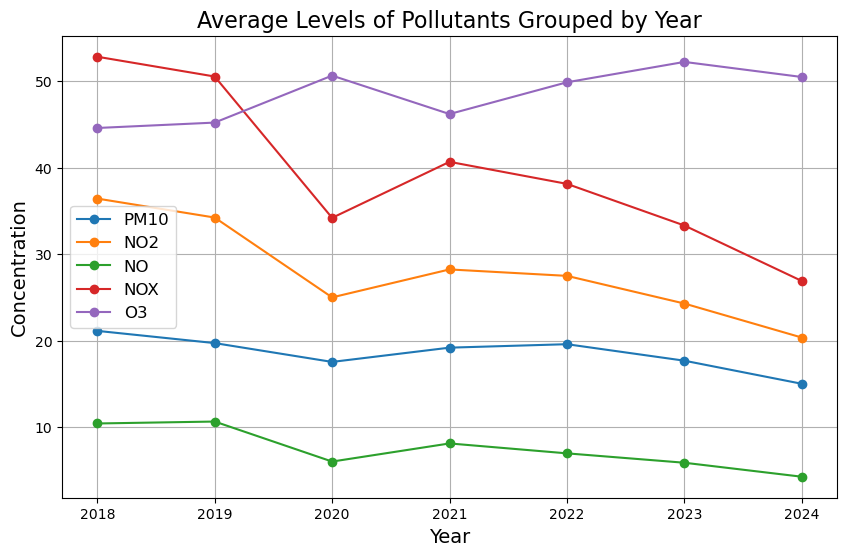

In [65]:
qp.avgAllPolutantsPerYear(daily_df)

          PM10       NO2        NO       NOX        O3
PM10  1.000000  0.668713  0.649251  0.709408  0.229389
NO2   0.668713  1.000000  0.703704  0.887967  0.532201
NO    0.649251  0.703704  1.000000  0.951585  0.538690
NOX   0.709408  0.887967  0.951585  1.000000  0.577860
O3    0.229389  0.532201  0.538690  0.577860  1.000000


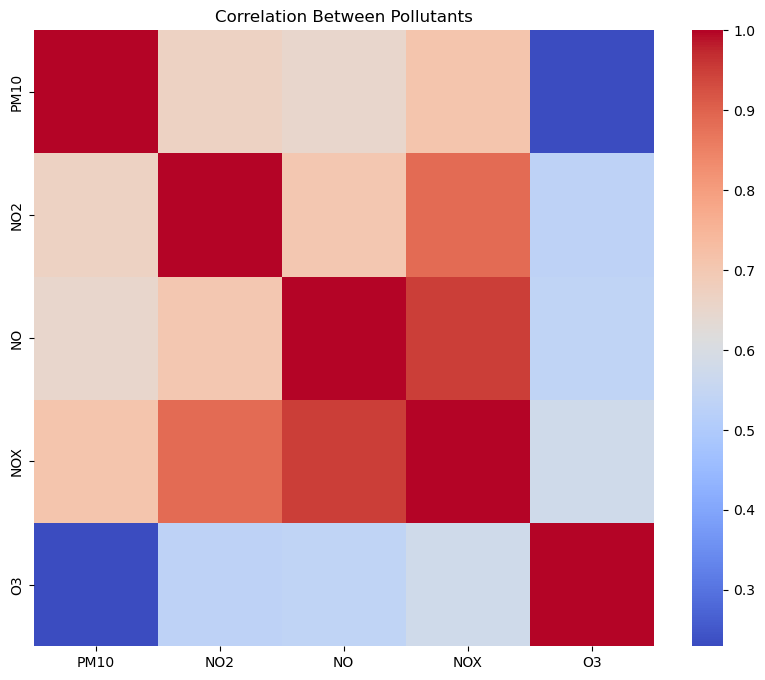

In [70]:
correlation_matrix = daily_df[["PM10", "NO2", "NO", "NOX", "O3"]].corr()
correlation_matrix = abs(correlation_matrix)
print(correlation_matrix)

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Between Pollutants")
plt.show()

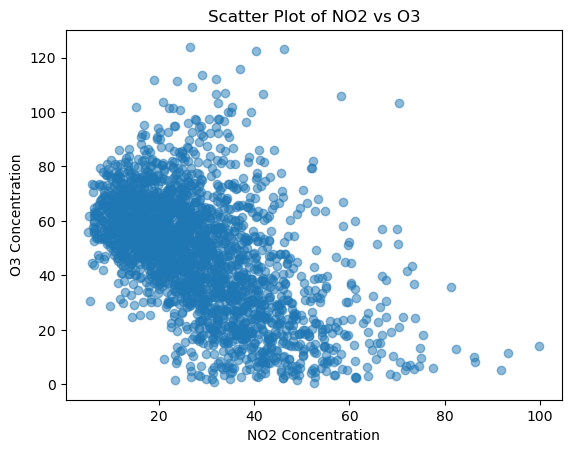

In [71]:
plt.scatter(daily_df['NO2'], daily_df['O3'], alpha=0.5)
plt.xlabel('NO2 Concentration')
plt.ylabel('O3 Concentration')
plt.title('Scatter Plot of NO2 vs O3')
plt.show()